In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [52]:
# Load and preprocess the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

170498071/170498071 [==============================] - 7s 0us/step


In [53]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(512, (5, 5), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/20
391/391 [==============================] - 11s 28ms/step - loss: 1.6062 - accuracy: 0.4071 - val_loss: 1.4017 - val_accuracy: 0.4904
Epoch 2/20
391/391 [==============================] - 11s 27ms/step - loss: 1.2325 - accuracy: 0.5605 - val_loss: 1.1385 - val_accuracy: 0.5946
Epoch 3/20
391/391 [==============================] - 11s 27ms/step - loss: 1.0719 - accuracy: 0.6217 - val_loss: 1.0366 - val_accuracy: 0.6303
Epoch 4/20
391/391 [==============================] - 11s 27ms/step - loss: 0.9661 - accuracy: 0.6617 - val_loss: 0.9928 - val_accuracy: 0.6516
Epoch 5/20
391/391 [==============================] - 11s 27ms/step - loss: 0.8690 - accuracy: 0.6966 - val_loss: 0.9308 - val_accuracy: 0.6771
Epoch 6/20
391/391 [==============================] - 11s 27ms/step - loss: 0.8022 - accuracy: 0.7197 - val_loss: 0.9235 - val_accuracy: 0.6800
Epoch 7/20
391/391 [==============================] - 11s 27ms/step - loss: 0.7398 - accuracy: 0.7410 - val_loss: 0.8972 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.2609 - accuracy: 0.7095
Test accuracy: 0.7095000147819519


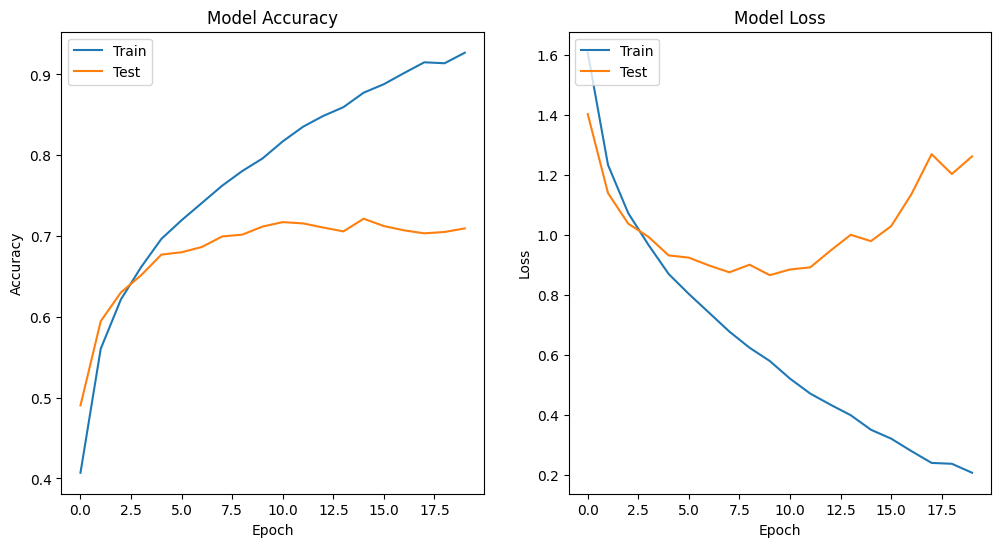

In [58]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history (accuracy and loss over epochs)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [67]:
# Define the classes in CIFAR-100 (for labeling purposes)
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
# Function to plot a grid of example images
def plot_example_images(images, labels, classes, num_examples=5):
    plt.figure(figsize=(12, 12))
    for i in range(num_examples * num_examples):
        plt.subplot(num_examples, num_examples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        # Find the index of the class with the maximum probability
        class_index = np.argmax(labels[i])
        plt.xlabel(classes[class_index], fontsize=8)
    plt.show()



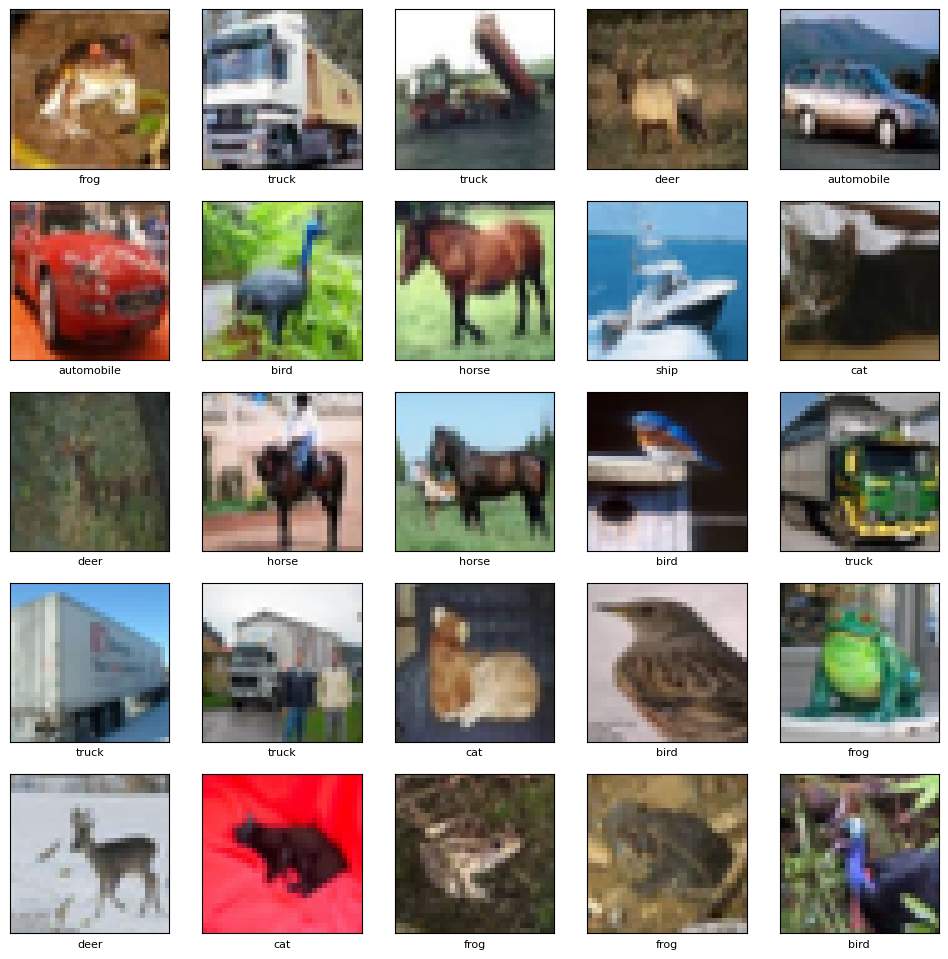

In [68]:
# Plot a grid of example images with actual labels
plot_example_images(train_images, train_labels, cifar10_classes, num_examples=5)

313/313 [==============================] - 1s 3ms/step


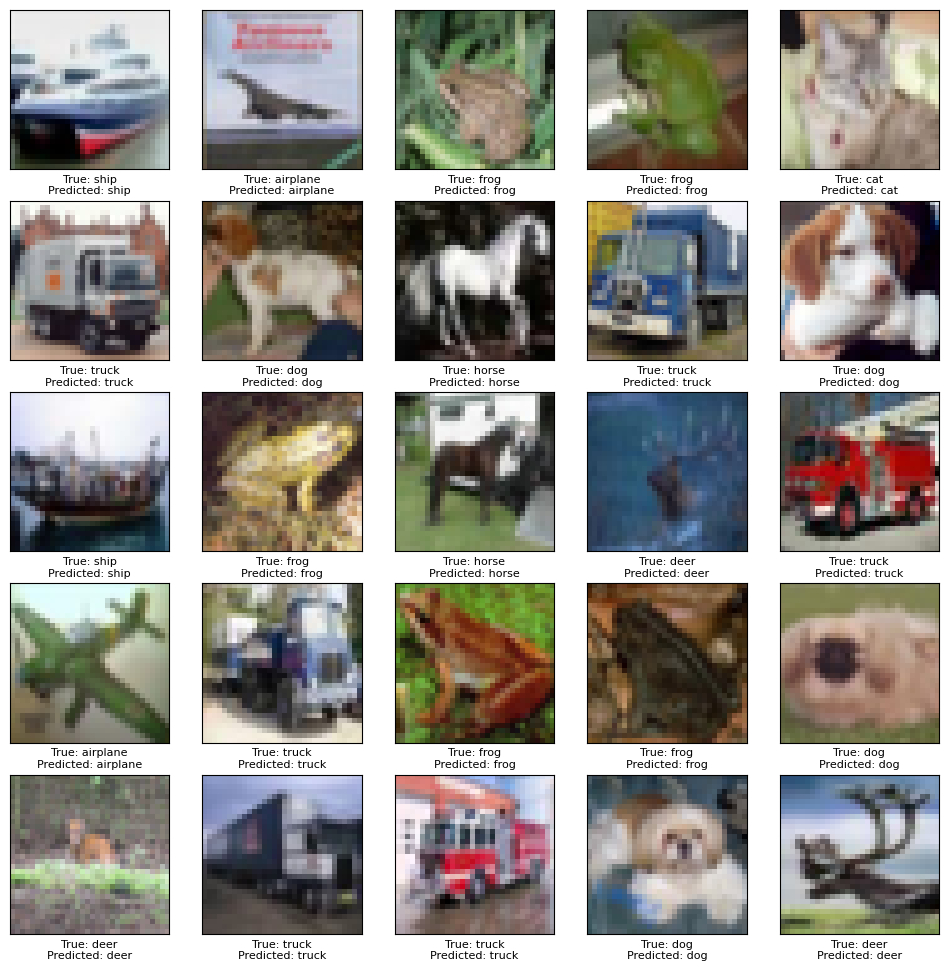

In [66]:
predictions = model.predict(test_images)

# Function to plot correctly detected example images
def plot_correctly_detected(images, true_labels, predicted_labels, classes, num_examples=5):
    correctly_detected_indices = np.where(np.argmax(predicted_labels, axis=1) == np.argmax(true_labels, axis=1))[0]

    plt.figure(figsize=(12, 12))
    for i in range(num_examples * num_examples):
        plt.subplot(num_examples, num_examples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        index = correctly_detected_indices[i]
        plt.imshow(images[index])
        
        true_label = np.argmax(true_labels[index])
        predicted_label = np.argmax(predicted_labels[index])
        
        plt.xlabel(f'True: {classes[true_label]}\nPredicted: {classes[predicted_label]}', fontsize=8)

    plt.show()

# Plot correctly detected example images
plot_correctly_detected(test_images, test_labels, predictions, cifar10_classes, num_examples=5)